# BAIT 509 Final Project Team 4: IBM Employee Attrition Analysis

#### Team Members: Donnica Chick, Danny Ng, Iqra Saeed, Rachel Ye, Evie Xu

# Part 1: Background, Motivation and Business Question

### Background and Motivation
According to a 2024 report by McKinsey & Company, the cost of replacing a single employee can reach up to 55,000 USD. For large companies like IBM, with an employee turnover rate of 16.12% (Hossain, 2023), the annual expenditure on employee replacement imposes a significant financial burden.

Utilizing an IBM dataset, our analysis aims to identify strategies to reduce the substantial costs associated with employee turnover at IBM.

### Business Question
Our analysis aims to address two primary business questions:

1.	Identifying IBM employees who are at risk of leaving.
2.	Recognizing the main factors contributing to employee attrition and assisting IBM in creating a more positive work environment where employees are more likely to remain. 


# Part 2: Data and Statistical Question

Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.base import BaseEstimator, TransformerMixin
import seaborn as sns

from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
# Preprocessing and pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats.mstats import winsorize

import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Part 3. Exploratory Data Analysis (EDA)

## Section 1. Data exploration/Data cleaning
In the Data exploration/cleaning part, I will be examining the given raw data and condensing it down to a more usable form. That includes:

- Split Train and Test set
- Detect outliers
- Drop redundent variables
- Check for Duplicates
- Check for missing values




- Predictive Modeling: Use ‘Attrition’ as a target variable for predictive analytics - Yes/No

## 1.1 Import dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


## 1.2 Split Train and Test set

In [4]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["Attrition"])

# Display dataset shapes
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Train set shape: (1176, 35)
Test set shape: (294, 35)


## 1.3 Inspect the Data

In [74]:
df.shape

(1470, 35)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [76]:
# Summary statistics
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

## 1.4 Checking for Missing values, Duplicate rows and Outliers 

In [77]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [78]:
# Check for duplicate rows
print("Duplicate rows in training set:", train_df.duplicated().sum())
print("Duplicate rows in test set:", test_df.duplicated().sum())

Duplicate rows in training set: 0
Duplicate rows in test set: 0


In [79]:
# Identify categorical variables
categorical_cols = train_df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [80]:
# Identify ordinal variables manually 
ordinal_cols = [
    "Education", "JobLevel", "EnvironmentSatisfaction", "JobInvolvement",
    "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction",
    "StockOptionLevel", "WorkLifeBalance"
]

ordinal_cols

['Education',
 'JobLevel',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [81]:
# Identify numerical variables
numerical_cols = train_df.select_dtypes(include=['int64', 'int32', 'float64', 'float32']).columns.tolist()

# Remove irrelevant columns if necessary (e.g. EmployeeNumber which is an identifier)
if 'EmployeeNumber' in numerical_cols:
    numerical_cols.remove('EmployeeNumber')

numerical_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [82]:
# check for ouliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0], lower_bound, upper_bound

# Select numerical columns for outlier detection
# numerical_cols
 
# Detect outliers in each column
outlier_results = {col: detect_outliers(train_df, col) for col in numerical_cols}

# Convert to DataFrame for better visualization
outlier_df = pd.DataFrame(outlier_results, index=["Outlier Count", "Lower Bound", "Upper Bound"]).T

# Display outlier detection results
print(outlier_df)

                          Outlier Count  Lower Bound  Upper Bound
Age                                 0.0       10.500       62.500
DailyRate                           0.0     -566.125     2190.875
DistanceFromHome                    0.0      -16.000       32.000
Education                           0.0       -1.000        7.000
EmployeeCount                       0.0        1.000        1.000
EnvironmentSatisfaction             0.0       -1.000        7.000
HourlyRate                          0.0       -4.500      135.500
JobInvolvement                      0.0        0.500        4.500
JobLevel                            0.0       -2.000        6.000
JobSatisfaction                     0.0       -1.000        7.000
MonthlyIncome                      86.0    -5260.750    16629.250
MonthlyRate                         0.0   -11028.625    39850.375
NumCompaniesWorked                 36.0       -3.500        8.500
PercentSalaryHike                   0.0        3.000       27.000
Performanc

C:\Users\donni\AppData\Local\Temp\ipykernel_34112\3323559510.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=train_df[col], ax=axes[i], palette="coolwarm")
C:\Users\donni\AppData\Local\Temp\ipykernel_34112\3323559510.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=train_df[col], ax=axes[i], palette="coolwarm")
C:\Users\donni\AppData\Local\Temp\ipykernel_34112\3323559510.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=train_df[col], ax=axes[i], palette="coolwarm")
C:\Users\donni\AppData\Local\Temp\ipykernel_34112\33235595

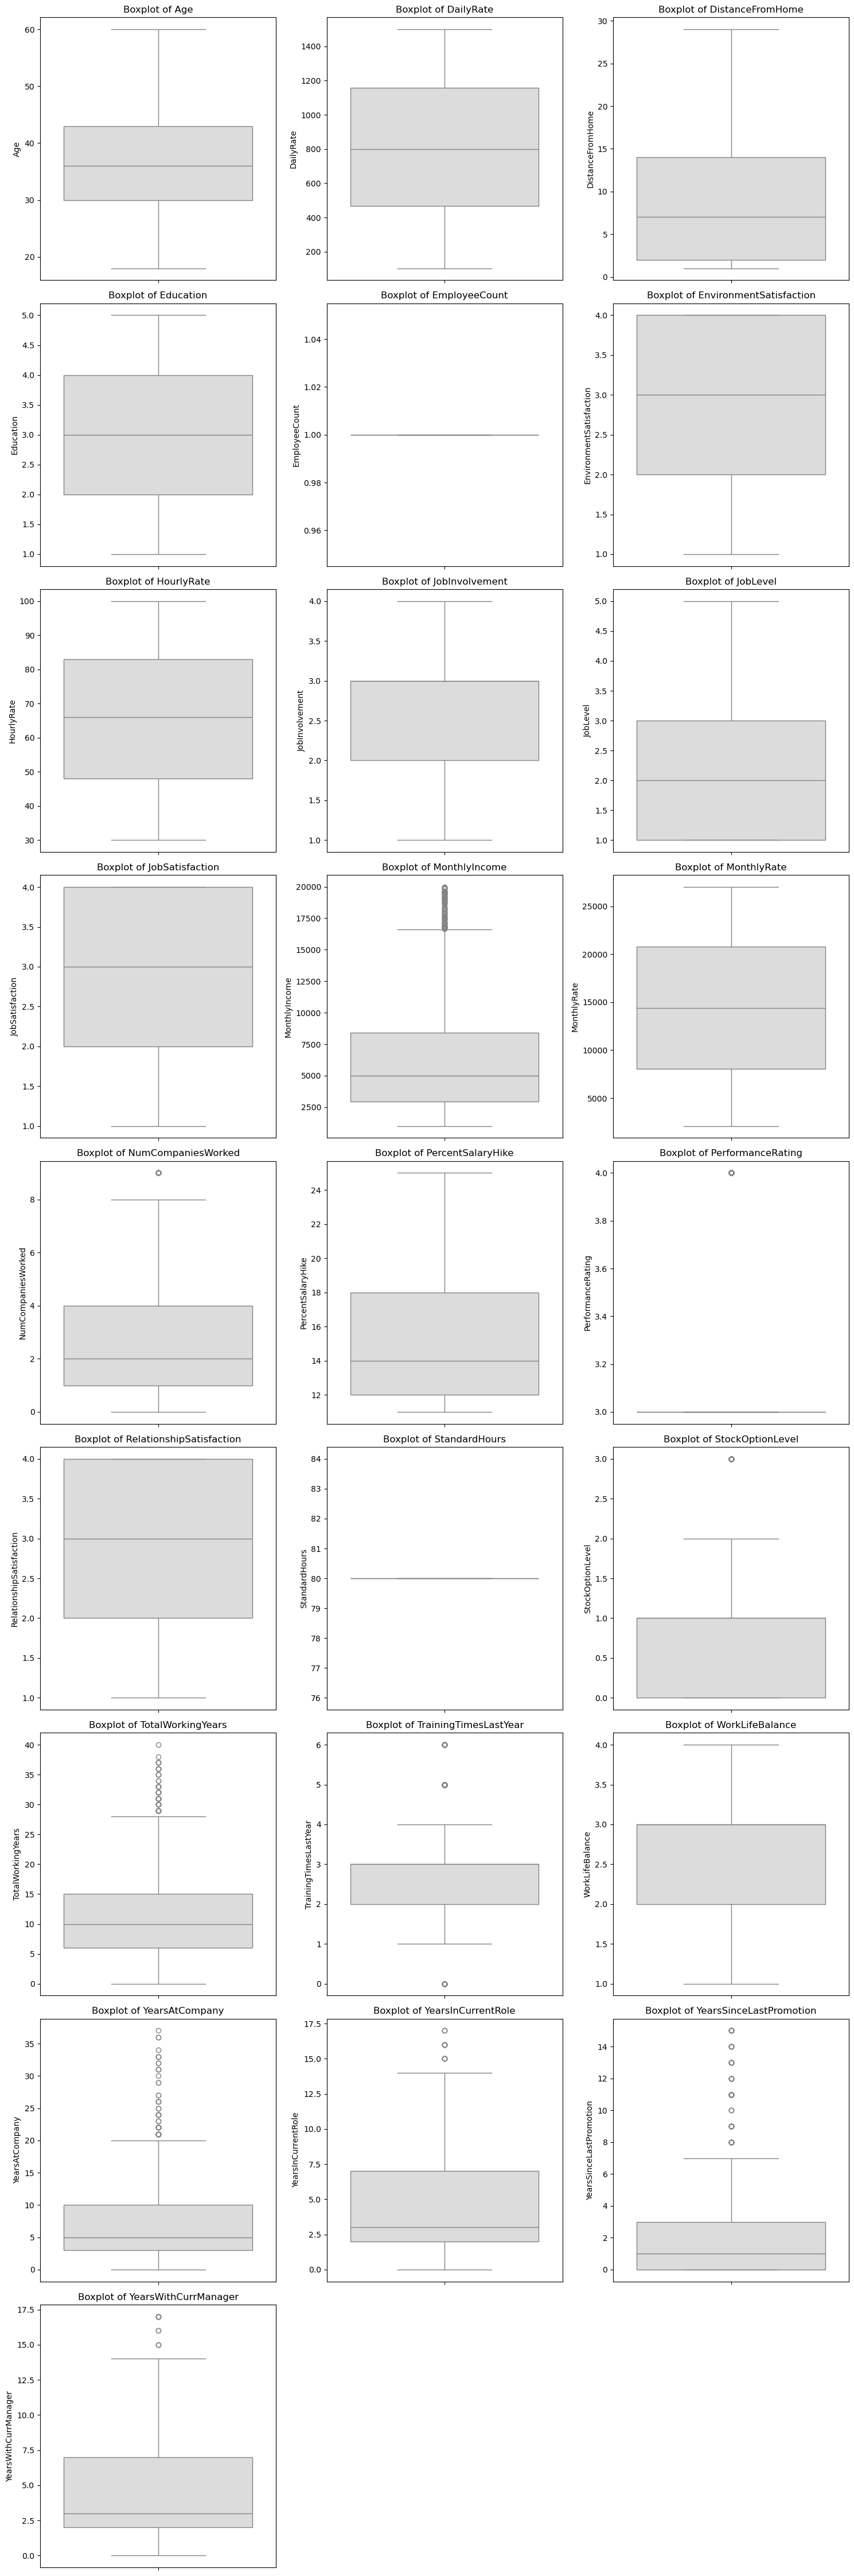

In [83]:
# Visualize outliers using boxplots
num_vars = len(numerical_cols)


rows = (num_vars // 3) + (num_vars % 3 > 0)  
cols = min(3, num_vars)  


fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  


axes = axes.flatten() if num_vars > 1 else [axes]

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=train_df[col], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"Boxplot of {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Check Class Balance

C:\Users\donni\AppData\Local\Temp\ipykernel_34112\2173392886.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df["Attrition"], palette="viridis")


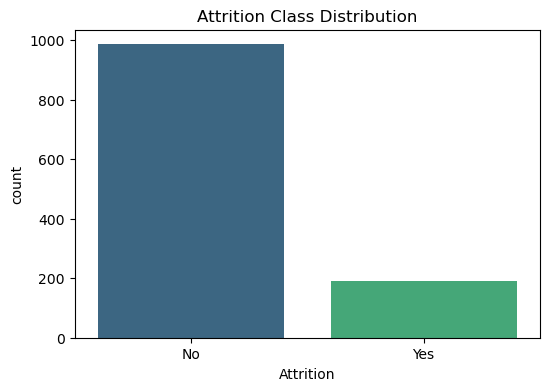

Attrition
No     0.838435
Yes    0.161565
Name: proportion, dtype: float64

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x=train_df["Attrition"], palette="viridis")
plt.title("Attrition Class Distribution")
plt.show()

# Display class distribution
train_df["Attrition"].value_counts(normalize=True)


## Section 2. Feature Analysis

## 2.1 Numerical Feature Distributions

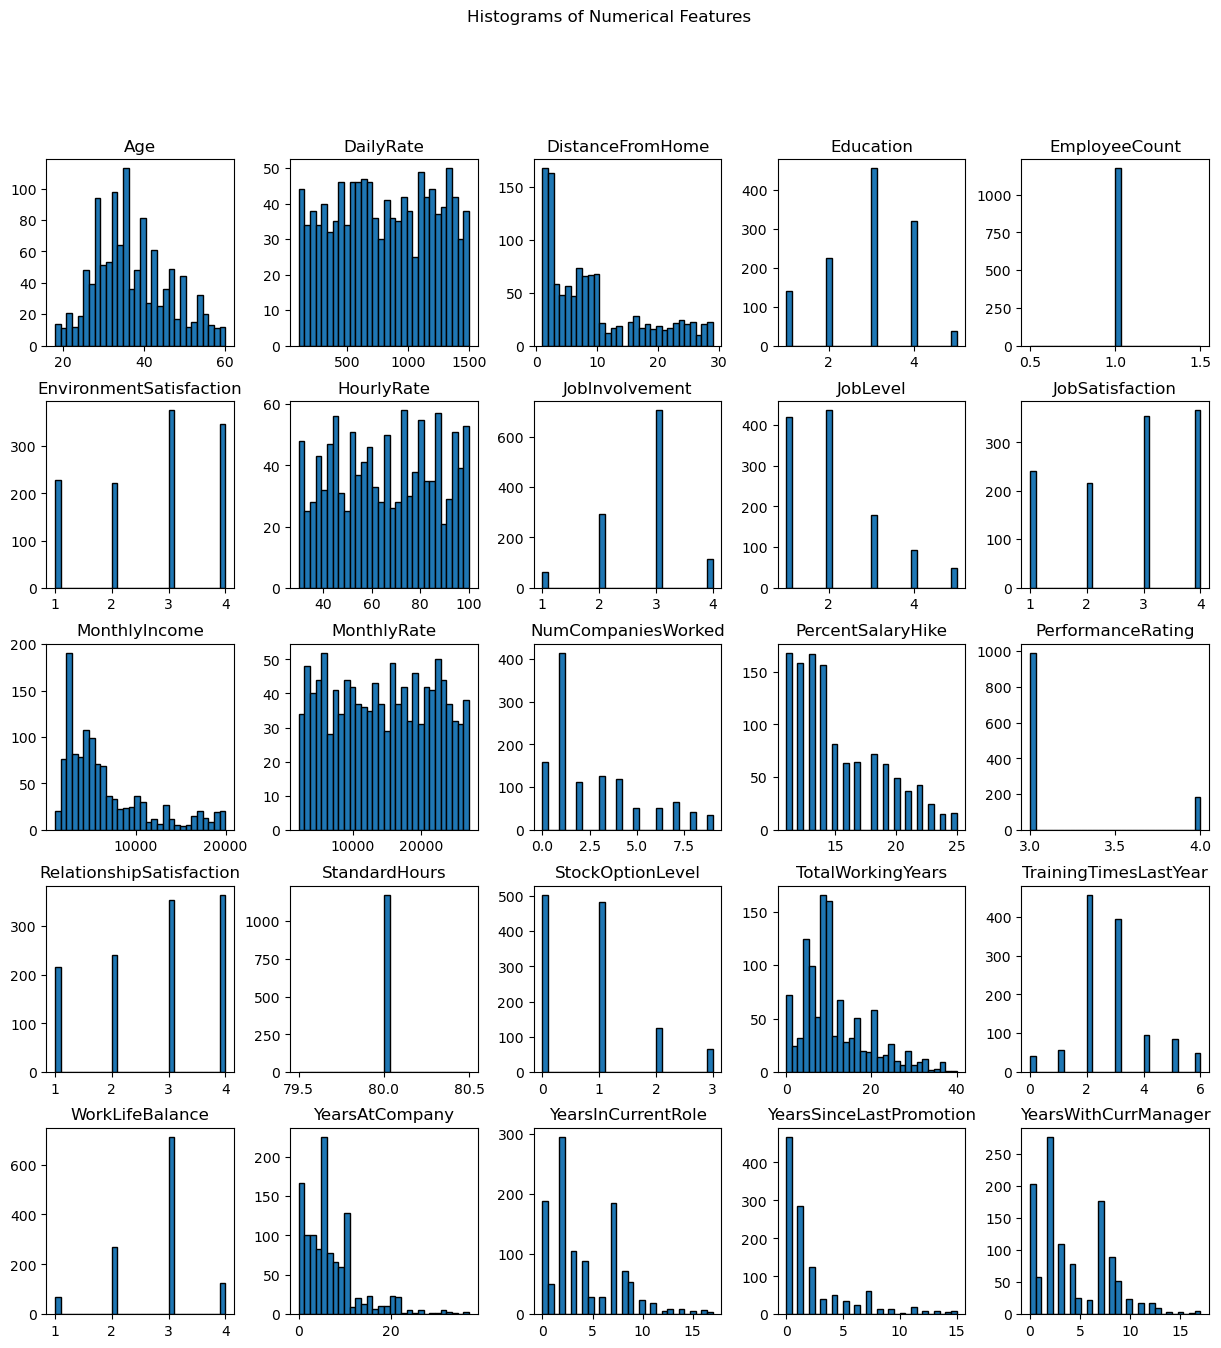

In [85]:
# Histograms of numerical features
train_df[numerical_cols].hist(figsize=(15, 15),grid= False, bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()

## 2.2 Categorical Feature Distributions

C:\Users\donni\AppData\Local\Temp\ipykernel_34112\930589127.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(data.index, rotation=45)
C:\Users\donni\AppData\Local\Temp\ipykernel_34112\930589127.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(data.index, rotation=45)


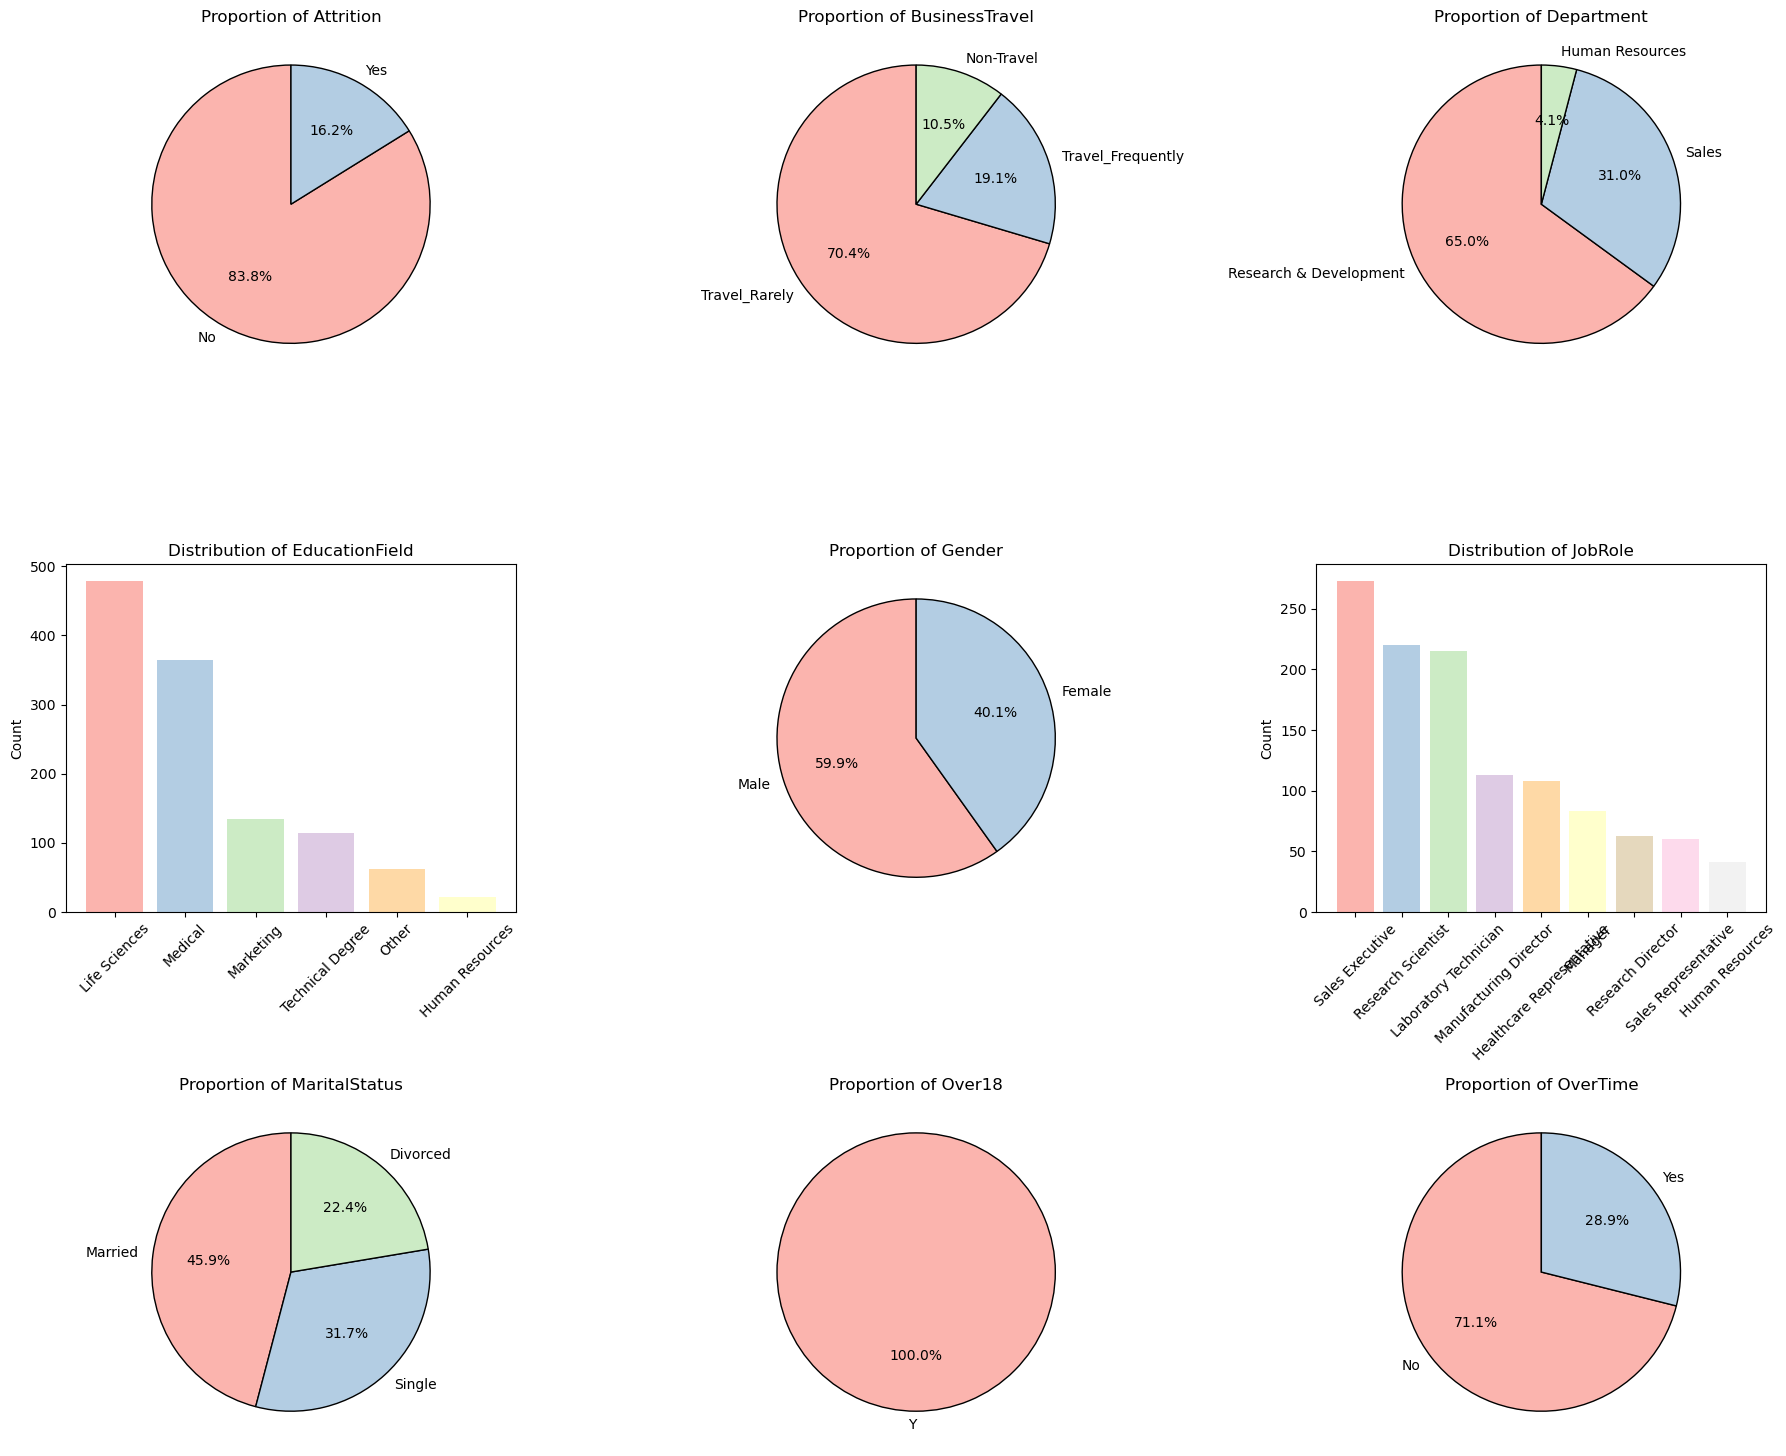

In [86]:

# Set up the figure with multiple subplots
num_cols = len(categorical_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(18, 20))

# Flatten axes to avoid indexing errors
axes = axes.flatten()

# Loop through categorical variables and plot pie charts
for i, col in enumerate(categorical_cols):
    data = train_df[col].value_counts()
    
    # Use a pie chart if categories are ≤ 5, otherwise use a bar chart
    if len(data) <= 5:
        axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, 
                    colors=plt.cm.Pastel1.colors, wedgeprops={'edgecolor': 'black'})
        axes[i].set_title(f"Proportion of {col}")
    else:
        axes[i].bar(data.index, data.values, color=plt.cm.Pastel1.colors)
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_ylabel("Count")
        axes[i].set_xticklabels(data.index, rotation=45)

# Remove extra subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## 2.3 Categorical Features vs Attrition

C:\Users\donni\AppData\Local\Temp\ipykernel_34112\929476185.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate labels for readability
C:\Users\donni\AppData\Local\Temp\ipykernel_34112\929476185.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate labels for readability
C:\Users\donni\AppData\Local\Temp\ipykernel_34112\929476185.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate labels for readability
C:\Users\donni\AppData\Local\Temp\ipykernel_34112\929476185.py:20: UserWarning: set_ticklabels() should only be used w

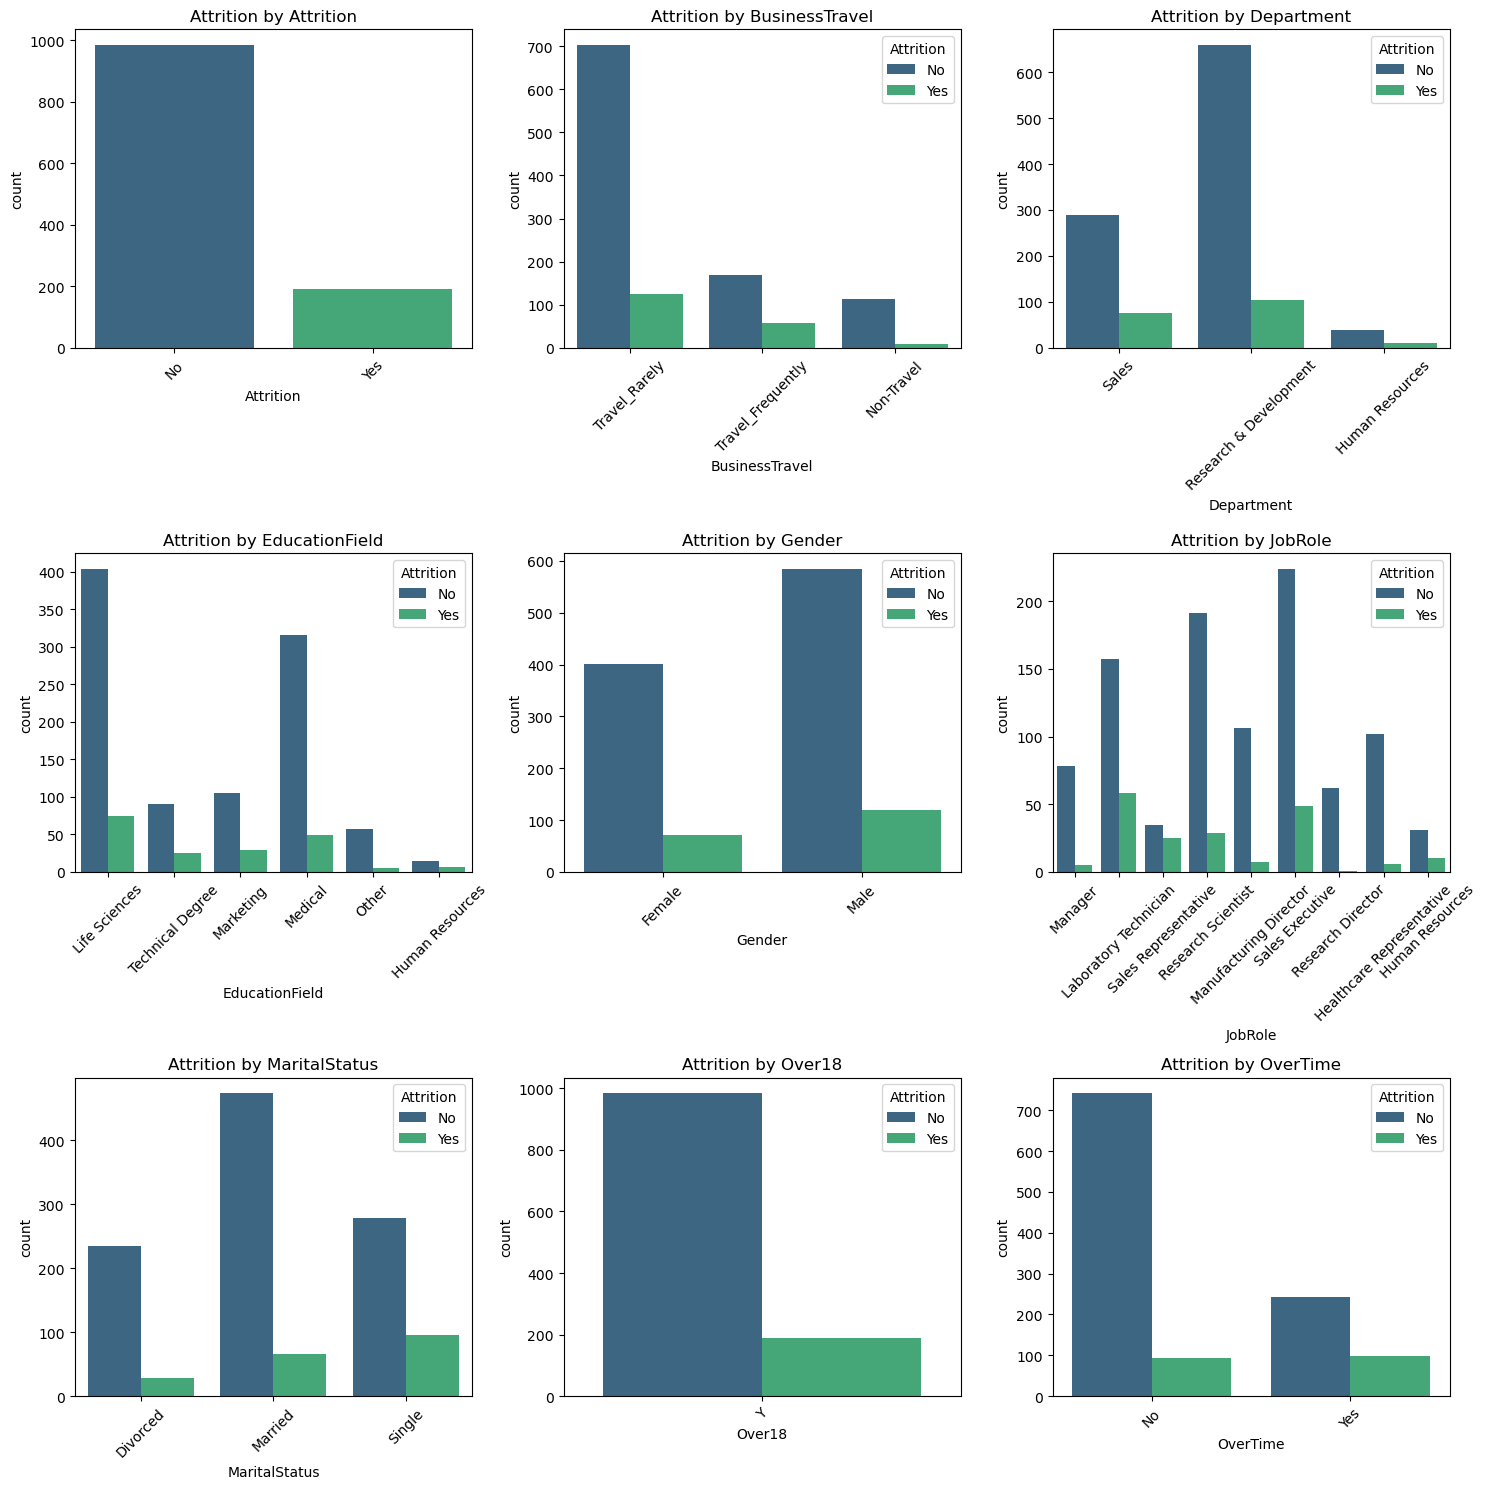

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get number of categorical features
num_features = len(categorical_cols)

# Dynamically calculate rows and columns
rows = math.ceil(num_features / 3)  # Auto-calculate rows based on the number of features
cols = min(3, num_features)  # Use max 3 columns

# Create subplots dynamically
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()  # Flatten axes to handle indexing properly

# Plot countplots for each categorical feature
for i, feature in enumerate(categorical_cols):
    sns.countplot(x=train_df[feature], hue=train_df["Attrition"], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Attrition by {feature}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate labels for readability

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## 2.4 Numerical Features vs Attrition

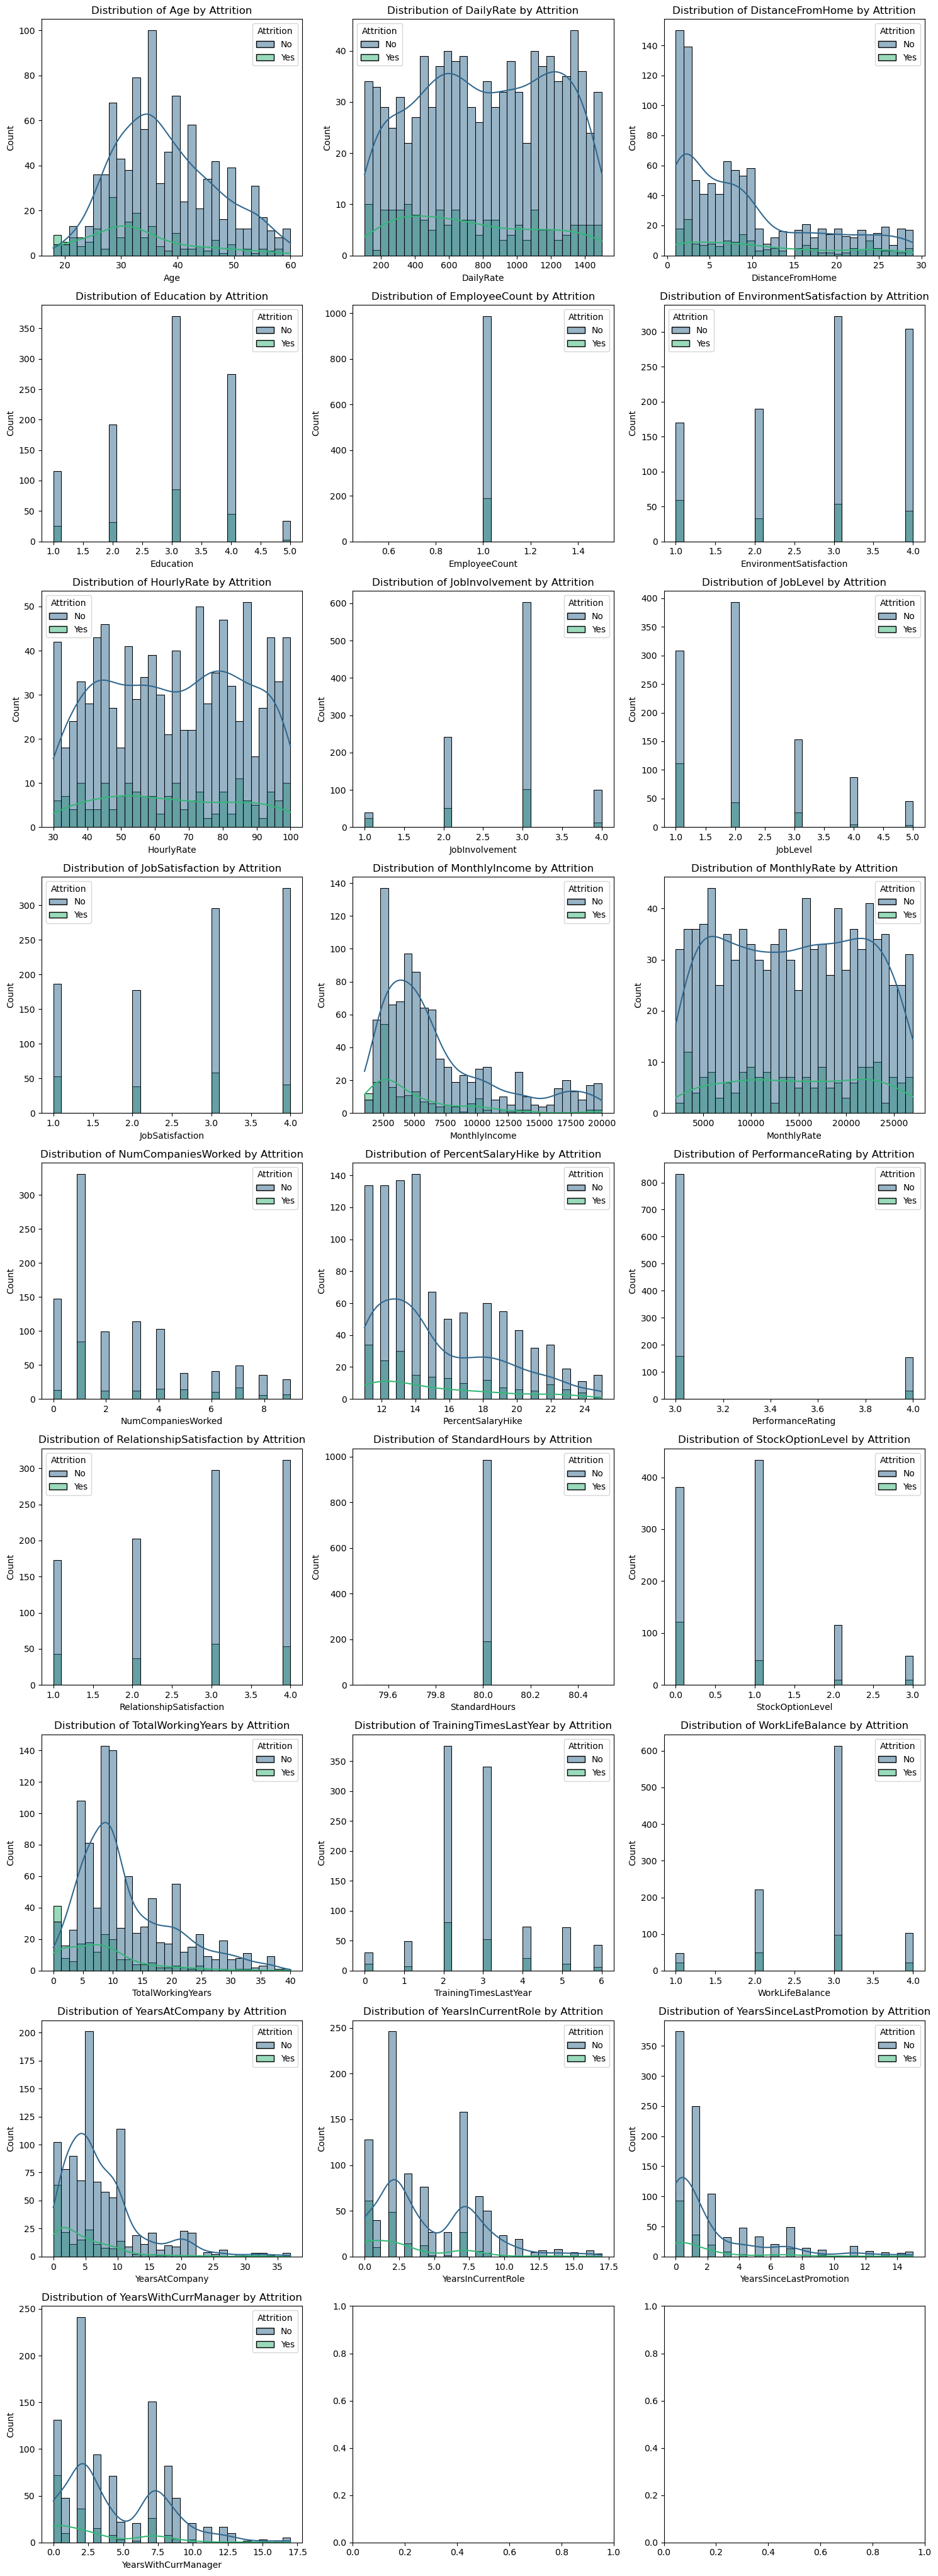

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(len(numerical_cols) // 3 + 1, 3, figsize=(15, 5 * len(numerical_cols) // 3))
axes = axes.flatten()

for i, feature in enumerate(numerical_cols):
    unique_values = train_df[feature].nunique()
    
    # Use KDE only if the feature has enough unique values
    kde_enabled = unique_values > 10  # Adjust threshold as needed
    
    sns.histplot(data=train_df, x=feature, hue="Attrition", kde=kde_enabled, bins=30, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribution of {feature} by Attrition")

plt.tight_layout()
plt.show()


## 2.5 Correlation Heat Map

/var/folders/s1/5wk_t8wj54ld22cw12y307740000gn/T/ipykernel_27849/1953092001.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1.2)


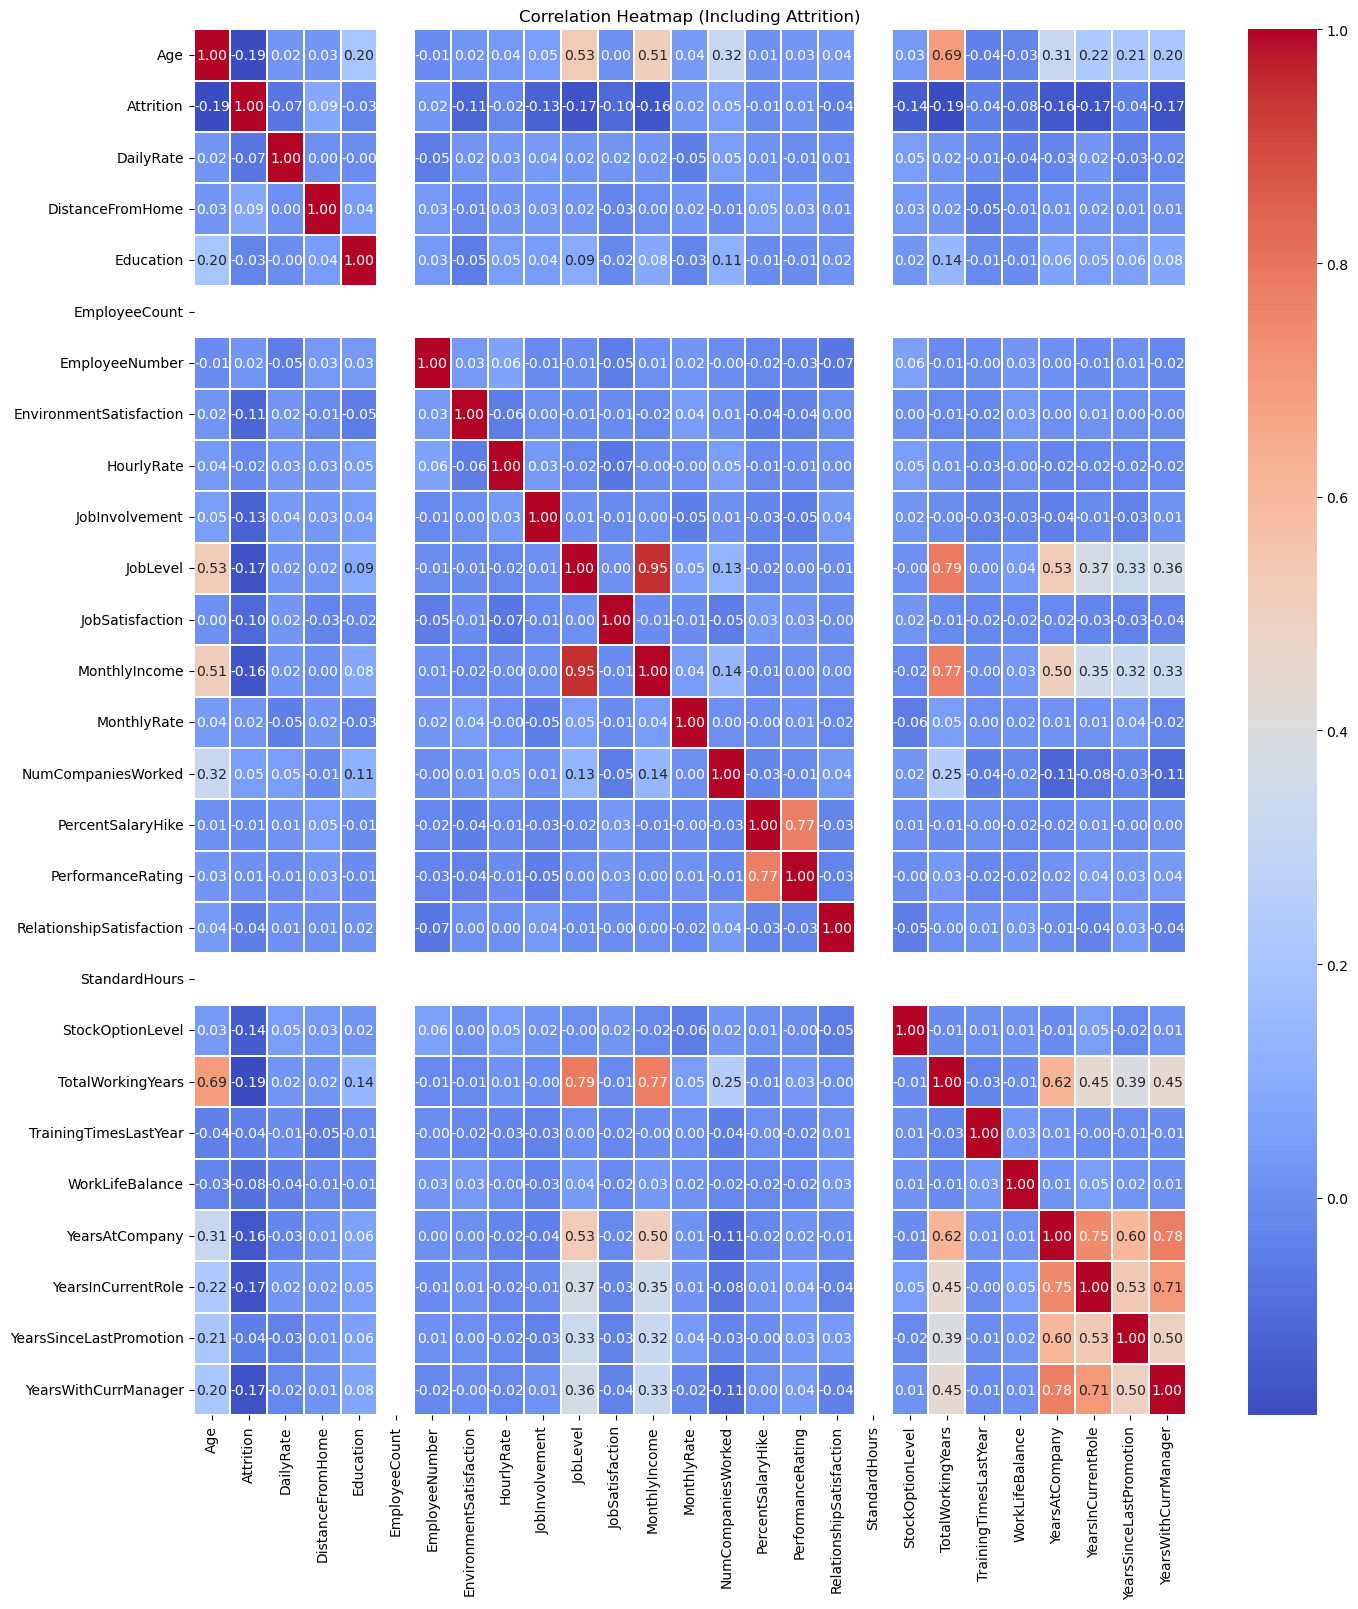

In [5]:
 # Convert Attrition from categorical to numerical (e.g., "Yes" -> 1, "No" -> 0)
train_df["Attrition"] = train_df["Attrition"].map({"Yes": 1, "No": 0})

# Now, re-run the correlation heatmap
plt.figure(figsize=(16, 18))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1.2)
plt.title("Correlation Heatmap (Including Attrition)")
plt.show()

# Part 4: Method and Results
## Section 1. Pre-processing 

In this step We need to:

- Handling outliers
- Impute missing values (SimpleImputer)
- Scale numerical features (StandardScaler)
- Encode categorical features (OneHotEncoder)

In [89]:
# 1️ **Apply Log Transformation (for right-skewed data)**
log_cols = ["MonthlyIncome", "TotalWorkingYears", "YearsAtCompany"]
for col in log_cols:
    train_df[col] = np.log1p(train_df[col])  # log1p avoids log(0) errors

# 2️ **Apply Winsorization to cap extreme outliers**
winsor_cols = ["PerformanceRating", "TrainingTimesLastYear", "YearsSinceLastPromotion"]
for col in winsor_cols:
    train_df[col] = winsorize(train_df[col], limits=[0.05, 0.05])  # Clip the top 5% and bottom 5% values

# 3️  **Remove extreme outliers for selected features**
remove_outliers = ["NumCompaniesWorked", "StockOptionLevel"]
for col in remove_outliers:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]  # Remove extreme values

# 4️ **Apply Standardization (Z-score normalization)**
scaler = StandardScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

In [90]:
# Define columns
numerical_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
    'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
    'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager']

categorical_cols = [
    'Attrition', 'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


ordinal_cols = [
    'Education', 'JobLevel', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
    'StockOptionLevel', 'WorkLifeBalance']


# Define Pipelines
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  
    ("scaler", StandardScaler())  
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  
    ("encoder", OneHotEncoder(handle_unknown="ignore", drop='first'))  # Avoid redundant columns
])

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  
    ("encoder", OrdinalEncoder())  # Automatically encodes ordinal values
])


# Combine Pipelines
preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numerical_cols),
    ("cat", categorical_pipeline, categorical_cols),
    ("ord", ordinal_pipeline, ordinal_cols)
])


In [91]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessor)  
])

In [92]:
# Apply the pipeline
train_df_cleaned = full_pipeline.fit_transform(train_df)

# Extract feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Convert transformed data into a DataFram
train_df_cleaned = pd.DataFrame(train_df_cleaned, columns=feature_names)

## Section 2: Feature Selection 

### Step 1: Removing highly correlated features 
Referring back to the correlation heatmap, we can identify all features that are highlighy correlated with each other. (Example: Here we are looking at feature pairs with a correlation of >0.7)

In [93]:
correlation_matrix = train_df_cleaned.corr()
# Create a mask to get the upper triangle of the matrix (since it's symmetrical)
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Filter pairs with correlation above 0.7
high_correlation_pairs = upper_triangle.stack().loc[lambda x: x > 0.7]

# Print the pairs
print(high_correlation_pairs)


num__MonthlyIncome       num__TotalWorkingYears          0.734768
                         ord__JobLevel                   0.917265
num__PercentSalaryHike   ord__PerformanceRating          0.773373
num__TotalWorkingYears   ord__JobLevel                   0.709945
num__YearsAtCompany      num__YearsInCurrentRole         0.795708
                         num__YearsWithCurrManager       0.810651
num__YearsInCurrentRole  num__YearsWithCurrManager       0.702674
cat__Department_Sales    cat__JobRole_Sales Executive    0.812260
dtype: float64


Look at feature pairs that have a correlation above 0.7, 0.8, and 0.9. Then remove the feature with a lower feature importance in each pair, and test the cross-entropy loss to compare with the baseline model (with no features removed). 

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import numpy as np
import pandas as pd

# Function to filter columns based on high correlation pairs and feature importance
def filter_high_correlation_columns(df, correlation_threshold, y):
    # Calculate the correlation matrix
    correlation_matrix = df.corr()
    
    # Create a mask to get the upper triangle of the matrix (since it's symmetrical)
    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
    )
    
    # Filter pairs with correlation above the threshold
    high_correlation_pairs = upper_triangle.stack().loc[lambda x: x > correlation_threshold]
    
    # Train a Random Forest model to get feature importances
    rf = RandomForestClassifier(random_state=42)
    rf.fit(df, y)
    feature_importances = pd.Series(rf.feature_importances_, index=df.columns)
    
    # Get the list of columns to drop
    columns_to_drop = set()
    for col1, col2 in high_correlation_pairs.index:
        # Compare the feature importance of each pair and drop the one with lower importance
        if feature_importances[col1] < feature_importances[col2]:
            columns_to_drop.add(col1)
        else:
            columns_to_drop.add(col2)
    
    # Remove the high-correlation columns
    return df.drop(columns=columns_to_drop)

# Prepare your target and features
X = train_df_cleaned.drop('cat__Attrition_Yes', axis=1)  # Update the target column name
y = train_df_cleaned['cat__Attrition_Yes']  # Update the target column name

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Run baseline RandomForest (without any filtering)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions and calculate log loss
baseline_preds_proba = rf.predict_proba(X_val)
baseline_log_loss = log_loss(y_val, baseline_preds_proba)

# Store the log loss results for comparison
log_loss_results = {"Baseline Model": baseline_log_loss}

# Empty variables to store filtered dataframes for each threshold
X_train_filtered_0_9_rf = None
X_train_filtered_0_8_rf = None
X_train_filtered_0_7_rf = None

# Iterate through correlation thresholds and evaluate models in reversed order
for threshold in [0.9, 0.8, 0.7]:
    # Filter the dataset for the current threshold (filtering both train and validation)
    X_train_filtered = filter_high_correlation_columns(X_train, threshold, y_train)
    X_val_filtered = X_val[X_train_filtered.columns]  # Ensure validation set uses the same columns
    
    # Assign the filtered datasets to the corresponding variables
    if threshold == 0.9:
        X_train_filtered_0_9_rf = X_train_filtered
    elif threshold == 0.8:
        X_train_filtered_0_8_rf = X_train_filtered
    elif threshold == 0.7:
        X_train_filtered_0_7_rf = X_train_filtered
    
    # Run RandomForest on the filtered dataset
    rf_filtered = RandomForestClassifier(random_state=42)
    rf_filtered.fit(X_train_filtered, y_train)
    
    # Make predictions and calculate log loss
    filtered_preds_proba = rf_filtered.predict_proba(X_val_filtered)
    filtered_log_loss = log_loss(y_val, filtered_preds_proba)
    
    # Store the log loss for the current threshold
    log_loss_results[f"Correlation Threshold {threshold}"] = filtered_log_loss


print("Log Loss Comparison for Random Forest:")
for threshold, loss in log_loss_results.items():
    print(f"{threshold}: {loss:.8f}")

Log Loss Comparison for Random Forest:
Baseline Model: 0.34042042
Correlation Threshold 0.9: 0.34886545
Correlation Threshold 0.8: 0.34299590
Correlation Threshold 0.7: 0.50222805


In [95]:
from sklearn.linear_model import LogisticRegression

# Function to filter columns based on high correlation pairs and feature importance
def filter_high_correlation_columns(df, correlation_threshold, y):
    # Calculate the correlation matrix
    correlation_matrix = df.corr()
    
    # Create a mask to get the upper triangle of the matrix (since it's symmetrical)
    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
    )
    
    # Filter pairs with correlation above the threshold
    high_correlation_pairs = upper_triangle.stack().loc[lambda x: x > correlation_threshold]
    
    # Train a Logistic Regression model to get feature importances (absolute coefficient values)
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(df, y)
    feature_importances = pd.Series(np.abs(lr.coef_)[0], index=df.columns)
    
    # Get the list of columns to drop
    columns_to_drop = set()
    for col1, col2 in high_correlation_pairs.index:
        # Compare the feature importance of each pair and drop the one with lower importance
        if feature_importances[col1] < feature_importances[col2]:
            columns_to_drop.add(col1)
        else:
            columns_to_drop.add(col2)
    
    # Remove the high-correlation columns
    return df.drop(columns=columns_to_drop)

# Prepare your target and features
X = train_df_cleaned.drop('cat__Attrition_Yes', axis=1)  # Update the target column name
y = train_df_cleaned['cat__Attrition_Yes']  # Update the target column name

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Run baseline logistic regression (without any filtering)
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Make predictions and calculate log loss
baseline_preds_proba = lr.predict_proba(X_val)
baseline_log_loss = log_loss(y_val, baseline_preds_proba)

# Store the log loss results for comparison
log_loss_results = {"Baseline Model": baseline_log_loss}

# Empty variables to store filtered dataframes for each threshold
X_train_filtered_0_9_lr = None
X_train_filtered_0_8_lr = None
X_train_filtered_0_7_lr = None

# Iterate through correlation thresholds and evaluate models in reversed order
for threshold in [0.9, 0.8, 0.7]:
    # Filter the dataset for the current threshold (filtering both train and validation)
    X_train_filtered = filter_high_correlation_columns(X_train, threshold, y_train)
    X_val_filtered = X_val[X_train_filtered.columns]  # Ensure validation set uses the same columns
    
    # Assign the filtered datasets to the corresponding variables
    if threshold == 0.9:
        X_train_filtered_0_9_lr = X_train_filtered
    elif threshold == 0.8:
        X_train_filtered_0_8_lr = X_train_filtered
    elif threshold == 0.7:
        X_train_filtered_0_7_lr = X_train_filtered
    
    # Run logistic regression on the filtered dataset
    lr_filtered = LogisticRegression(max_iter=1000, random_state=42)
    lr_filtered.fit(X_train_filtered, y_train)
    
    # Make predictions and calculate log loss
    filtered_preds_proba = lr_filtered.predict_proba(X_val_filtered)
    filtered_log_loss = log_loss(y_val, filtered_preds_proba)
    
    # Store the log loss for the current threshold
    log_loss_results[f"Correlation Threshold {threshold}"] = filtered_log_loss

# Print the log loss results for comparison
print("Log Loss Comparison for Logistic Regression:")
for threshold, loss in log_loss_results.items():
    print(f"{threshold}: {loss:.8f}")


Log Loss Comparison for Logistic Regression:
Baseline Model: 0.32260685
Correlation Threshold 0.9: 0.31705063
Correlation Threshold 0.8: 0.31710687
Correlation Threshold 0.7: 0.32690158


For RandomForest, best performance was achieved with the base model, which had the lowest log loss. <br>
For Logistic Regression, best performance was achieved with a threshold of 0.9. <br>

### Step 2a: Permutation Importance (Logistic Regression)
Look at permutation importance using Logistic Regression

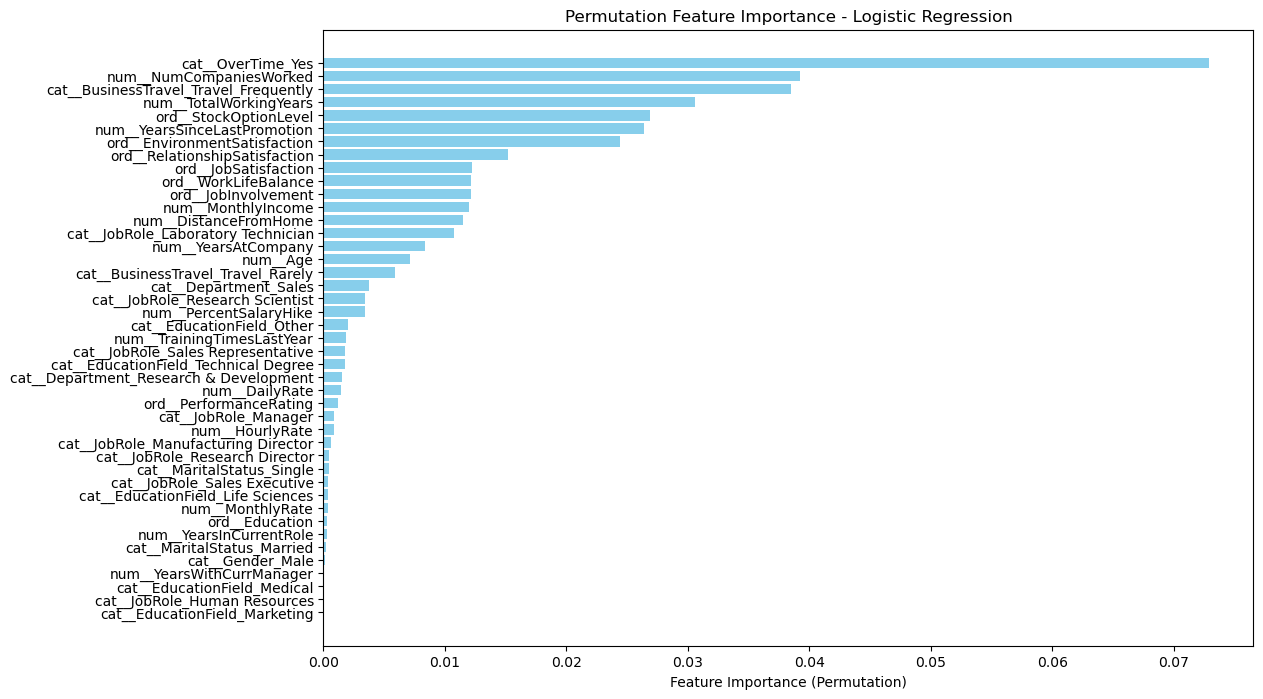

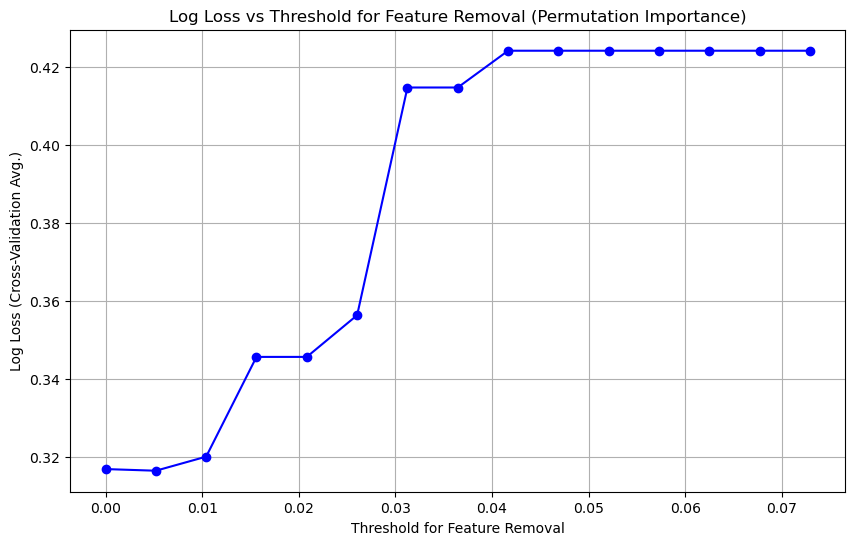

Baseline Log Loss (Before Feature Removal): 0.272681
Minimum Log Loss (from Cross-Validation): 0.316528 at Threshold: 0.005208

Features dropped at threshold 0.005208 
['cat__Department_Sales', 'cat__JobRole_Research Scientist', 'num__PercentSalaryHike', 'cat__EducationField_Other', 'num__TrainingTimesLastYear', 'cat__JobRole_Sales Representative', 'cat__EducationField_Technical Degree', 'cat__Department_Research & Development', 'num__DailyRate', 'ord__PerformanceRating', 'cat__JobRole_Manager', 'num__HourlyRate', 'cat__JobRole_Manufacturing Director', 'cat__JobRole_Research Director', 'cat__MaritalStatus_Single', 'cat__JobRole_Sales Executive', 'cat__EducationField_Life Sciences', 'num__MonthlyRate', 'ord__Education', 'num__YearsInCurrentRole', 'cat__MaritalStatus_Married', 'cat__Gender_Male', 'num__YearsWithCurrManager', 'cat__EducationField_Medical', 'cat__JobRole_Human Resources', 'cat__EducationField_Marketing']


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import log_loss

X_lr = X_train_filtered_0_9_lr
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_lr, y, test_size=0.2, random_state=42, stratify=y)

# Step 1: Train Logistic Regression model on the original data (before removing features)
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_lr, y)

# Step 2: Compute Permutation Importance
perm_importance = permutation_importance(lr, X_lr, y, scoring='neg_log_loss', n_repeats=10, random_state=42)

# Convert to DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_lr.columns,
    'Importance': np.abs(perm_importance.importances_mean)  # Take absolute values
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 3: Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance (Permutation)')
plt.title('Permutation Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

# Step 4: Calculate baseline log_loss metric before removing features
baseline_preds_proba = lr.predict_proba(X_lr)
baseline_log_loss = log_loss(y, baseline_preds_proba)

# Step 5: Iterate over different thresholds for feature removal
thresholds = np.linspace(0, np.max(feature_importance_df['Importance']), num=15)
log_losses = []  # Store log loss for each threshold

# Cross-validation settings
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for threshold in thresholds:
    
    # Remove features with importance lower than the current threshold
    low_importance_features = feature_importance_df[feature_importance_df['Importance'] < threshold]['Feature']
    
    # Create new dataset without these low-importance features
    X_filtered = X_lr.drop(columns=low_importance_features)

    # Check if any features remain
    if X_filtered.shape[1] == 0:
        continue  # Skip if no features are left

    # Step 6: Use cross-validation to train Logistic Regression and compute log loss
    fold_log_losses = []

    for train_idx, val_idx in kf.split(X_filtered, y):
        X_train_fold, X_val_fold = X_filtered.iloc[train_idx], X_filtered.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        
        # Train Logistic Regression model
        lr_filtered = LogisticRegression(max_iter=1000, random_state=42)
        lr_filtered.fit(X_train_fold, y_train_fold)
        
        # Compute log loss
        preds_proba = lr_filtered.predict_proba(X_val_fold)
        fold_log_losses.append(log_loss(y_val_fold, preds_proba))

    # Compute average log loss for this threshold
    avg_log_loss = np.mean(fold_log_losses)
    log_losses.append(avg_log_loss)

# Step 7: Plot Log Loss vs. Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, log_losses, marker='o', color='b', linestyle='-', label='Log Loss')
plt.xlabel('Threshold for Feature Removal')
plt.ylabel('Log Loss (Cross-Validation Avg.)')
plt.title('Log Loss vs Threshold for Feature Removal (Permutation Importance)')
plt.grid(True)
plt.show()

# Step 8: Find the minimum log loss and corresponding threshold
min_log_loss = min(log_losses)
min_log_loss_threshold = thresholds[log_losses.index(min_log_loss)]

print(f"Baseline Log Loss (Before Feature Removal): {baseline_log_loss:.6f}")
print(f"Minimum Log Loss (from Cross-Validation): {min_log_loss:.6f} at Threshold: {min_log_loss_threshold:.6f}")

# Step 9: Store the filtered dataset for the best threshold
low_importance_features = feature_importance_df[feature_importance_df['Importance'] < min_log_loss_threshold]['Feature']
X_filtered_min_threshold_lr = X_lr.drop(columns=low_importance_features)

X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X_filtered_min_threshold_lr, y, test_size=0.2, stratify=y, random_state=42)

print(f"\nFeatures dropped at threshold {min_log_loss_threshold:.6f} \n{list(low_importance_features)}")


### Step 2b: Permutation Importance (Random Forest)
Look at permutation importance using Random Forest

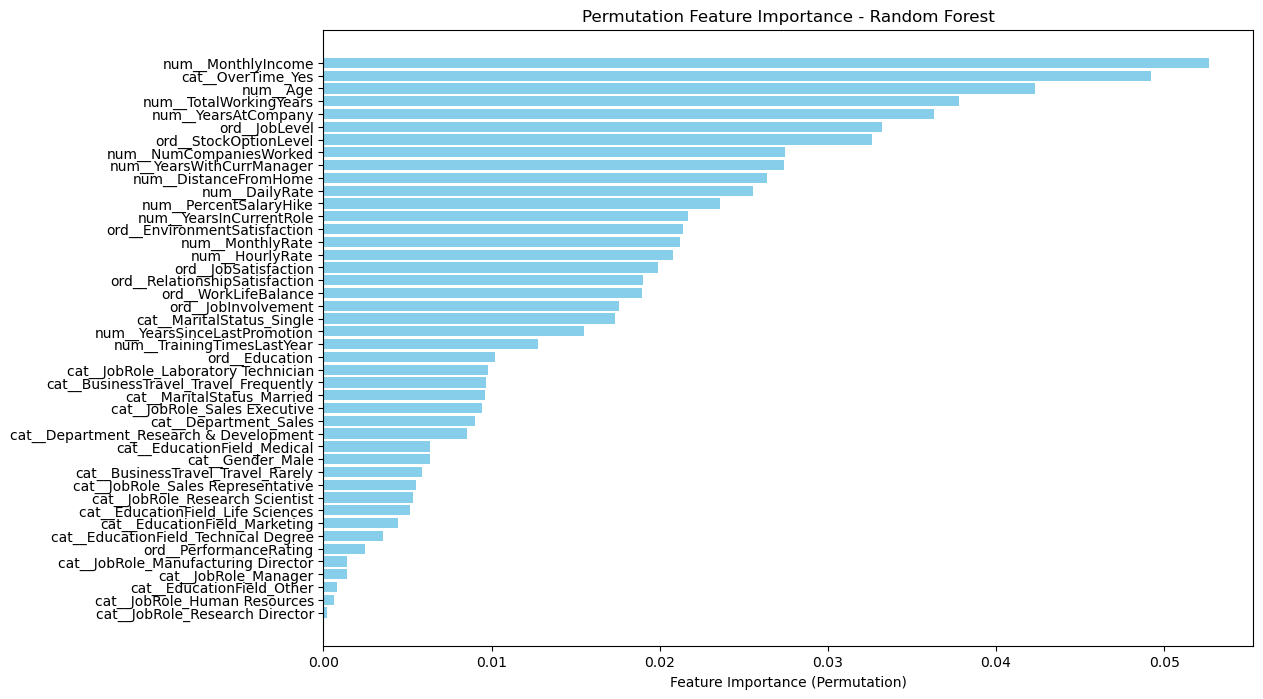

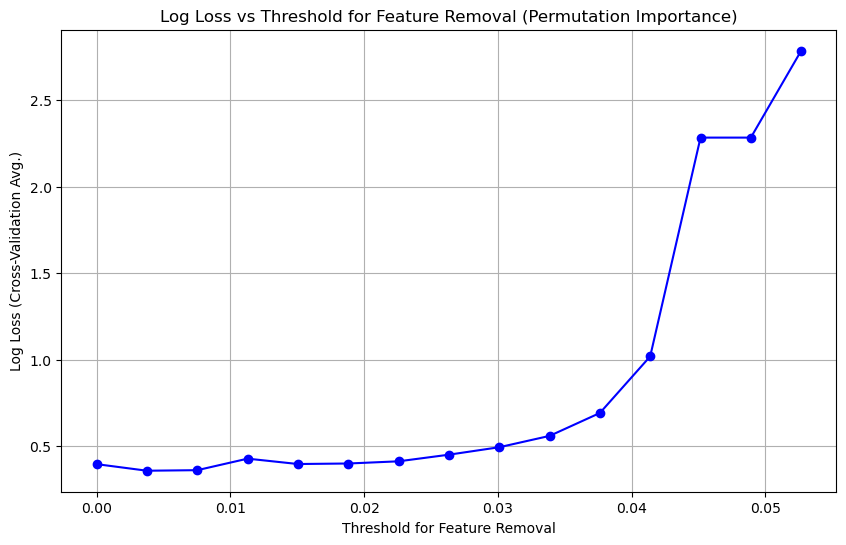

Minimum Log Loss (from Cross-Validation): 0.358155 at Threshold: 0.003762
Features dropped at threshold 0.003762: 
['cat__EducationField_Technical Degree', 'ord__PerformanceRating', 'cat__JobRole_Manufacturing Director', 'cat__JobRole_Manager', 'cat__EducationField_Other', 'cat__JobRole_Human Resources', 'cat__JobRole_Research Director']


In [97]:
from sklearn.ensemble import RandomForestClassifier

X = train_df_cleaned.drop('cat__Attrition_Yes', axis=1)  # Update the target column name
y = train_df_cleaned['cat__Attrition_Yes']  # Update the target column name

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train Random Forest model on the original data
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Step 2: Compute Permutation Importance
perm_importance = permutation_importance(rf, X, y, scoring='neg_log_loss', n_repeats=10, random_state=42)

# Convert to DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(perm_importance.importances_mean)  # Take absolute values
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 3: Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance (Permutation)')
plt.title('Permutation Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Step 4: Calculate baseline log_loss metric before removing features
baseline_preds_proba = rf.predict_proba(X_val)
baseline_log_loss = log_loss(y_val, baseline_preds_proba)

# Step 5: Iterate over different thresholds for feature removal
thresholds = np.linspace(0, np.max(feature_importance_df['Importance']), num=15)
log_losses = []  # Store log loss for each threshold

# Cross-validation settings
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for threshold in thresholds:
    
    # Remove features with importance lower than the current threshold
    low_importance_features = feature_importance_df[feature_importance_df['Importance'] < threshold]['Feature']
    
    # Create new dataset without these low-importance features
    X_filtered = X.drop(columns=low_importance_features)

    # Check if any features remain
    if X_filtered.shape[1] == 0:
        log_losses.append(np.nan)  # Append NaN if no features are left
        continue  

    # Step 6: Use cross-validation to train Random Forest and compute log loss
    fold_log_losses = []

    for train_idx, val_idx in kf.split(X_filtered, y):
        X_train_fold, X_val_fold = X_filtered.iloc[train_idx], X_filtered.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        
        # Train Random Forest model
        rf_filtered = RandomForestClassifier(random_state=42)
        rf_filtered.fit(X_train_fold, y_train_fold)
        
        # Compute log loss
        preds_proba = rf_filtered.predict_proba(X_val_fold)
        fold_log_losses.append(log_loss(y_val_fold, preds_proba))

    # Compute average log loss for this threshold
    avg_log_loss = np.mean(fold_log_losses)
    log_losses.append(avg_log_loss)

# Step 7: Plot Log Loss vs. Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, log_losses, marker='o', color='b', linestyle='-', label='Log Loss')
plt.xlabel('Threshold for Feature Removal')
plt.ylabel('Log Loss (Cross-Validation Avg.)')
plt.title('Log Loss vs Threshold for Feature Removal (Permutation Importance)')
plt.grid(True)
plt.show()

# Step 8: Find the minimum log loss and corresponding threshold
min_log_loss = min(log_losses)
min_log_loss_threshold = thresholds[log_losses.index(min_log_loss)]

print(f"Minimum Log Loss (from Cross-Validation): {min_log_loss:.6f} at Threshold: {min_log_loss_threshold:.6f}")

# Step 9: Store the filtered dataset for the best threshold
low_importance_features = feature_importance_df[feature_importance_df['Importance'] < min_log_loss_threshold]['Feature']
X_filtered_min_threshold_rf = X.drop(columns=low_importance_features)

X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(X_filtered_min_threshold_rf, y, test_size=0.2, stratify=y, random_state=42)

print(f"Features dropped at threshold {min_log_loss_threshold:.6f}: \n{list(low_importance_features)}")


### Step 3: Adding Interaction Terms

We experimented with various interaction terms in our model to better capture the complex interdependencies between different features. Initially, we constructed combinations using intuitive pairings, such as education and monthly income, which are commonly interrelated. However, integrating these terms did not enhance our model’s performance and instead led to poorer accuracy metrics, resulting in their exclusion from further analyses.

Upon exploring different combinations, we found that incorporating interactions of job satisfaction with work-life balance, and age with income, significantly boosted the accuracy of our random forest model. Nonetheless, during cross-validation, these interaction terms appeared to contribute to overfitting, likely due to issues related to multicollinearity and increased model complexity.

Given these challenges and the risk of overfitting, we ultimately decided against including interaction terms in our final model.


In [98]:
# # Adding the interaction terms to the training dataset
# X_train_filtered_0_01['interaction_JobSat_WorkLife'] = X_train_filtered_0_01['ord__JobSatisfaction'] * X_train_filtered_0_01['ord__WorkLifeBalance']
# X_train_filtered_0_01['interaction_Age_Income'] = X_train_filtered_0_01['num__Age'] * X_train_filtered_0_01['num__MonthlyIncome']

# # Adding the same interaction terms to the validation dataset
# X_val_filtered_0_01['interaction_JobSat_WorkLife'] = X_val_filtered_0_01['ord__JobSatisfaction'] * X_val_filtered_0_01['ord__WorkLifeBalance']
# X_val_filtered_0_01['interaction_Age_Income'] = X_val_filtered_0_01['num__Age'] * X_val_filtered_0_01['num__MonthlyIncome']

## Section 3.  Model Setting and Corresponding Performance Metrics

### Business Questions:A binary classification model to predict whether employees are at risk of leaving the company based on different attributes?

#### Variable - attrition class 0: not at risk of leaving the company (Stay)
#### Variable - attrition class 1: at risk of leaving the company (Quit)

### 3. 1 Random Forest 

RandomForestClassifier with balanced class weights was used due to imbalanced data .This helps reduce overfitting, avoiding model learning too much data.

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

#### 3.1.1 Hyperparameter Tuning and Create Model

In [101]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 10]
}

# Initialize base model
rf_model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)


#### 3.1.2 Model Training wth Grid Search

In [102]:
# Fit grid search
grid_search.fit(X_train_rf, y_train_rf)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.4858166735561441


#### 3.1.3 Predicting the model

In [103]:
# Make predictions using best model
y_pred = best_model.predict(X_val_rf)
y_pred_proba = best_model.predict_proba(X_val_rf)[:, 1]

#### 3.1.4 Evaluating the models using different performance metrics

1. Accuracy : to find out how well we're identifying both employees who stay and leave

2. Precision : Helps avoid spending retention resources on employees who aren't actually at risk

3. Recall : Shows how many potential leavers we're identifying

4. F1-Score : Balances precision and recall

5. ROC-AUC :  how well our model distinguishes between employees likely to stay vs leave



Model Performance Metrics:
------------------------------
Accuracy: 0.8750
Precision: 0.6429
Recall: 0.5143
F1-Score: 0.5714
ROC-AUC: 0.8279


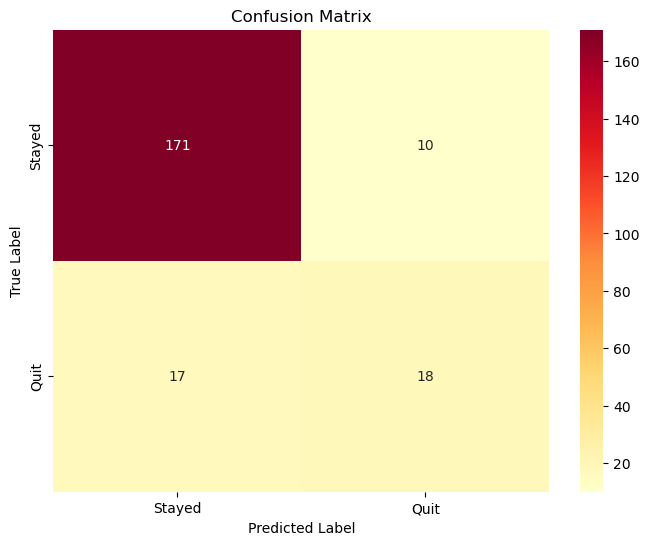


Detailed Classification Report:
Number of employees predicted to stay: 188
Number of employees predicted to quit: 28

Of those who actually quit:
Correctly identified: 18
Missed: 17


In [104]:
def evaluate_model_complete(y_true, y_pred, y_pred_proba):
    # Calculate metrics
    print("\nModel Performance Metrics:")
    print("-" * 30)
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred_proba):.4f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
                xticklabels=['Stayed', 'Quit'],
                yticklabels=['Stayed', 'Quit'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Print classification details
    print("\nDetailed Classification Report:")
    print("Number of employees predicted to stay:", cm[0,0] + cm[1,0])
    print("Number of employees predicted to quit:", cm[0,1] + cm[1,1])
    print("\nOf those who actually quit:")
    print(f"Correctly identified: {cm[1,1]}")
    print(f"Missed: {cm[1,0]}")

# Evaluate model
evaluate_model_complete(y_val_rf, y_pred, y_pred_proba)




#### Confusion Matrix evaluation:

True Positives (Stayed): 171

False Positives (Stayed but predicted as Quit): 10

False Negatives (Quit but predicted as Stayed): 17

True Positives (Quit): 18


In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def evaluate_model(y_true, y_pred, y_pred_proba):
    # Print detailed classification report
    print("Test Set Evaluation:")
    print(classification_report(y_true, y_pred))
    
    # Calculate metrics for each class separately
    print("\nDetailed Metrics per Class:")
    print("-" * 40)
    
    # Class 0 (Stayed)
    print("Class 0 (Stayed):")
    print(f"Precision: {precision_score(y_true, y_pred, pos_label=0):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, pos_label=0):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, pos_label=0):.4f}")
    
    # Class 1 (Quit)
    print("\nClass 1 (Quit):")
    print(f"Precision: {precision_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, pos_label=1):.4f}")
    
    # Overall metrics
    print("\nOverall Metrics:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred_proba):.4f}")

# Use the function
evaluate_model(y_val_rf, y_pred, y_pred_proba)

Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       181
         1.0       0.64      0.51      0.57        35

    accuracy                           0.88       216
   macro avg       0.78      0.73      0.75       216
weighted avg       0.87      0.88      0.87       216


Detailed Metrics per Class:
----------------------------------------
Class 0 (Stayed):
Precision: 0.9096
Recall: 0.9448
F1-Score: 0.9268

Class 1 (Quit):
Precision: 0.6429
Recall: 0.5143
F1-Score: 0.5714

Overall Metrics:
Accuracy: 0.8750
ROC-AUC: 0.8279


### Evaluating metrics performance for Quit & Stay on validation set:

1. Precision (Stayed) = 0.92 – 92% predicted as "Stayed" were correct
2. Recall (Stayed) = 0.97 – 97% of  "Stayed" employees were identified correctly
3. Precision (Quit): 0.76 –  76%  predicted "Quit" were correct
4. Recall (Quit): 0.57 – 57% of  "Quit" employees were identified correctly


### Evaluating overall metrics performance on validation set:

1. Accuracy = 0.9012 : Our model 's prediction is 87.79% correct
2. F1-Score = 0.90 : Good Balanced Performance
3. ROC-AUC = 0.8934 :  The model has good discriminative ability


### 3.2 Logisic Regression

Scale the numerical features

In [106]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform on training data
X_train_scaled = scaler.fit_transform(X_train_lr)

# Transform test data (X_val)
X_val_scaled = scaler.transform(X_val_lr)  # Apply the same transformation to test set


#### 3.2.1 Train logistic regression

Check the Shapes of X_train_scaled and y_train

Ensure y_train Matches X_train_scaled

In [107]:
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of y_train: {y_train_lr.shape}")


Shape of X_train_scaled: (688, 17)
Shape of y_train: (688,)


In [108]:
# Make sure y_train has the same index as X_train_lr
y_train = y_train_lr.loc[X_train_lr.index]

# Check if shapes match now
print(f"Shape of X_train_scaled after fixing: {X_train_scaled.shape}")
print(f"Shape of y_train after fixing: {y_train.shape}")


Shape of X_train_scaled after fixing: (688, 17)
Shape of y_train after fixing: (688,)


In [109]:
# Re-scale X_train_lr
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_lr)
X_val_scaled = scaler.transform(X_val_lr)  # Transform validation set


In [110]:
# Train Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = log_reg.predict(X_val_scaled)


In [127]:
from sklearn.linear_model import LogisticRegression

# Define the model
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Train Logistic Regression
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

Most important features from the Logistic Regression model. 

In [130]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_lr.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val_lr.columns)

# Now, extract feature importance
feature_importance = np.abs(log_reg.coef_[0])
feature_names = X_train_scaled.columns  # Now this works!

# Create DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print(importance_df.head(10))  # Adjust as needed


                                  Feature  Importance
4                  num__TotalWorkingYears    0.941045
10                      cat__OverTime_Yes    0.709704
7   cat__BusinessTravel_Travel_Frequently    0.626496
3                 num__NumCompaniesWorked    0.597720
6            num__YearsSinceLastPromotion    0.492582
12                    ord__JobInvolvement    0.455714
15                  ord__StockOptionLevel    0.439826
11           ord__EnvironmentSatisfaction    0.379270
8       cat__BusinessTravel_Travel_Rarely    0.285212
1                   num__DistanceFromHome    0.269726


In [128]:
# Predict on Test Set
y_pred = log_reg.predict(X_val_scaled)

# Predict Probabilities (for ROC-AUC score)
y_pred_proba = log_reg.predict_proba(X_val_scaled)[:, 1]  # Probabilities for class "1" (Attrition)


In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Get Predictions
y_pred = log_reg.predict(X_val_scaled)
y_pred_proba = log_reg.predict_proba(X_val_scaled)[:, 1]  # Get probability of "Quit" class (1)

# Compute Metrics
accuracy = accuracy_score(y_val_lr, y_pred)
precision_stayed = precision_score(y_val_lr, y_pred, pos_label=0)  # Precision for "Stayed"
recall_stayed = recall_score(y_val_lr, y_pred, pos_label=0)  # Recall for "Stayed"
precision_quit = precision_score(y_val_lr, y_pred, pos_label=1)  # Precision for "Quit"
recall_quit = recall_score(y_val_lr, y_pred, pos_label=1)  # Recall for "Quit"
f1 = f1_score(y_val_lr, y_pred)  # F1-score (balanced performance)
roc_auc = roc_auc_score(y_val_lr, y_pred_proba)  # ROC-AUC

# Print Results
print(f"Evaluating Metrics Performance for Logistic Regression")
print(f"Precision (Stayed) = {precision_stayed:.2f} – {precision_stayed*100:.0f}% of predicted 'Stayed' were correct")
print(f"Recall (Stayed) = {recall_stayed:.2f} – {recall_stayed*100:.0f}% of 'Stayed' employees were identified correctly")
print(f"Precision (Quit) = {precision_quit:.2f} – {precision_quit*100:.0f}% of predicted 'Quit' were correct")
print(f"Recall (Quit) = {recall_quit:.2f} – {recall_quit*100:.0f}% of 'Quit' employees were identified correctly")

print(f"Overall Model Performance")
print(f"Accuracy = {accuracy:.4f} : Our model's prediction is {accuracy*100:.2f}% correct")
print(f"F1-Score = {f1:.2f} : Good Balanced Performance")
print(f"ROC-AUC = {roc_auc:.4f} : The model has good discriminative ability")


Evaluating Metrics Performance for Logistic Regression
Precision (Stayed) = 0.96 – 96% of predicted 'Stayed' were correct
Recall (Stayed) = 0.78 – 78% of 'Stayed' employees were identified correctly
Precision (Quit) = 0.42 – 42% of predicted 'Quit' were correct
Recall (Quit) = 0.82 – 82% of 'Quit' employees were identified correctly
Overall Model Performance
Accuracy = 0.7849 : Our model's prediction is 78.49% correct
F1-Score = 0.55 : Good Balanced Performance
ROC-AUC = 0.8857 : The model has good discriminative ability


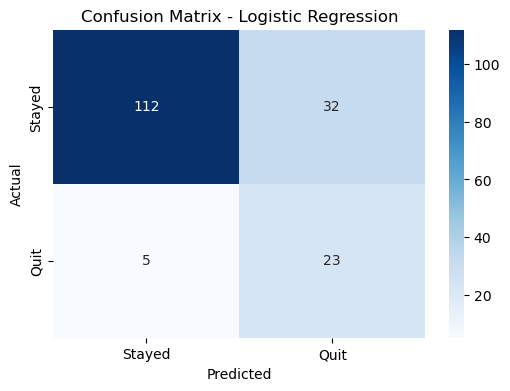

Detailed Classification Report
Number of employees predicted to stay: 117
Number of employees predicted to quit: 55

Of those who actually quit:
Correctly identified (True Positives): 23
Missed cases (False Negatives): 5
Full Classification Report
              precision    recall  f1-score   support

      Stayed       0.96      0.78      0.86       144
        Quit       0.42      0.82      0.55        28

    accuracy                           0.78       172
   macro avg       0.69      0.80      0.71       172
weighted avg       0.87      0.78      0.81       172



In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Compute Confusion Matrix
cm = confusion_matrix(y_val_lr, y_pred)

# Extract individual counts from Confusion Matrix
TN, FP, FN, TP = cm.ravel()  # True Negatives, False Positives, False Negatives, True Positives

# Calculate additional details
num_predicted_stay = TN + FN  # Total predicted as "Stayed"
num_predicted_quit = TP + FP  # Total predicted as "Quit"
correctly_identified_quit = TP  # True Positives
missed_quit = FN  # False Negatives

# Display Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Quit'], yticklabels=['Stayed', 'Quit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Display Detailed Classification Report
print("Detailed Classification Report")
print(f"Number of employees predicted to stay: {num_predicted_stay}")
print(f"Number of employees predicted to quit: {num_predicted_quit}")
print("\nOf those who actually quit:")
print(f"Correctly identified (True Positives): {correctly_identified_quit}")
print(f"Missed cases (False Negatives): {missed_quit}")

# Display full classification report for additional insights
print("Full Classification Report")
print(classification_report(y_val_lr, y_pred, target_names=['Stayed', 'Quit']))


#### 3.2.2 Hyper parameter tuning for Logistic Regression

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Testing different regularization strengths
    'penalty': ['l1', 'l2'],  # L1 (Lasso) helps with feature selection, L2 (Ridge) prevents overfitting
    'solver': ['liblinear', 'saga']  # 'liblinear' is good for small datasets, 'saga' is good for large ones
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# Define scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Run Grid Search separately for each metric
best_scores = {}

for metric in scoring_metrics:
    grid_search = GridSearchCV(
        estimator=log_reg, 
        param_grid=param_grid, 
        cv=5,  # 5-Fold Cross-Validation
        scoring=metric,  # Optimize for current metric
        n_jobs=-1, 
        verbose=1
    )
    
    grid_search.fit(X_train_scaled, y_train_lr)
    
    # Store best parameters and best score for this metric
    best_scores[metric] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

# Print best parameters and scores for each metric
for metric, results in best_scores.items():
    print(f"Best Parameters for Logistic Regression ({metric.capitalize()}): {results['best_params']}")
    print(f"Best {metric.capitalize()} Score: {results['best_score']:.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for Logistic Regression (Accuracy): {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy Score: 0.8372
Best Parameters for Logistic Regression (Precision): {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Precision Score: 0.4183
Best Parameters for Logistic Regression (Recall): {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Recall Score: 0.7953
Best Parameters for Logistic Regression (F1): {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best F1 Score: 0.5421


### 3.3 Cross Validation

In [116]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, recall_score

# Define Stratified K-Fold (5-fold cross-validation)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metric (Recall for "Quit" cases)
scorer = make_scorer(recall_score, pos_label=1)

# Incorporate Tuned Parameters for Logistic Regression
log_reg = LogisticRegression(
    class_weight='balanced', 
    solver='liblinear',  
    penalty='l2',  # ✅ Added L1 Regularization
    C=0.1,  # ✅ Best C value from tuning
    random_state=42
)

# Optimized Random Forest (Using Best Parameters)
rf = RandomForestClassifier(
    max_depth=20,  
    max_features='sqrt',  
    min_samples_leaf=10,  
    min_samples_split=2,  
    n_estimators=200,  
    class_weight='balanced',  
    random_state=42
)

# Perform Cross-Validation
log_reg_cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=cv, scoring=scorer)
rf_cv_scores = cross_val_score(rf, X_train_rf, y_train_rf, cv=cv, scoring=scorer)  # Ensure correct dataset

# Print Cross-Validation Results
print("Cross-Validation Results for Logistic Regression (Optimized for Precision and Recall)")
print(f"Mean Recall: {log_reg_cv_scores.mean():.4f} ± {log_reg_cv_scores.std():.4f}")

print("Cross-Validation Results for Random Forest (Optimized)")
print(f"Mean Recall: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")


Cross-Validation Results for Logistic Regression (Optimized for Precision and Recall)
Mean Recall: 0.7399 ± 0.0568
Cross-Validation Results for Random Forest (Optimized)
Mean Recall: 0.4394 ± 0.0828


In [117]:
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Logistic Regression Cross-Validation
log_reg_cv_results = {metric: cross_val_score(log_reg, X_train_scaled, y_train_lr, cv=cv, scoring=metric).mean() for metric in scoring_metrics}

# Random Forest Cross-Validation
rf_cv_results = {metric: cross_val_score(rf, X_train_rf, y_train_rf, cv=cv, scoring=metric).mean() for metric in scoring_metrics}

# Print results
print("Cross-Validation Results for Logistic Regression")
for metric, score in log_reg_cv_results.items():
    print(f"{metric.capitalize()}: {score:.4f}")

print("Cross-Validation Results for Random Forest")
for metric, score in rf_cv_results.items():
    print(f"{metric.capitalize()}: {score:.4f}")


Cross-Validation Results for Logistic Regression
Accuracy: 0.7646
Precision: 0.3920
Recall: 0.7399
F1: 0.5094
Roc_auc: 0.8205
Cross-Validation Results for Random Forest
Accuracy: 0.8430
Precision: 0.5172
Recall: 0.4394
F1: 0.4723
Roc_auc: 0.7829


Random Forest has High Accuracy but Low Recall. It has 84.3% accuracy as most employees stay so model predicts stay accurately. At 51.72% precision, it's prediction of quit is better than logistic regression however recall for quit is low at 43.94% which means it misses many actual quitters. The data is imbalanced so it may overfit to the majority class of stay. 

Logistic Regression has Lower Accuracy but Higher Recall. High recall (73.99%) indicates that it accurately identifies most employees who are at risk of quiting. Precision (39.2%) is low which indicates that few employees that were predicted to quit, stayed in the company. Attrition rate is predicted better than random forest as it can forecast which employees can quit in the future. 

### 3.4 Tune Random Forest for Higher Recall

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the adjusted parameter grid
param_grid = {
    'max_depth': [15, 20],  # Allow deeper trees to capture patterns
    'min_samples_split': [5, 10],  # Less restrictive splits to capture smaller patterns
    'min_samples_leaf': [4, 10],  # Keep reasonable min leaf nodes
    'n_estimators': [200, 300],  # Keep it stable (avoid excessive trees)
    'class_weight': [None, 'balanced_subsample']  # Try different balancing strategies
}

# Initialize the Random Forest Model (Base Model)
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV to optimize for Recall
rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-Fold Cross Validation
    scoring='recall',  # Optimize for Recall
    n_jobs=-1,  # Use all CPU cores
    verbose=1  # Print progress
)

# Fit GridSearchCV on the training data
rf_grid.fit(X_train_rf, y_train_rf)

# Print the best parameters and recall score
print("Best Parameters for Random Forest (Optimized for Recall):", rf_grid.best_params_)
print("Best Recall Score:", rf_grid.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters for Random Forest (Optimized for Recall): {'class_weight': 'balanced_subsample', 'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Recall Score: 0.4375661375661376


Recall rate has slightly decreased from 43.94% to 43.76% therefore, we will proceed ahead with the original model parameters.

### 3.5 Try an Advanced Model: XGBoost

In [119]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [120]:
import xgboost
print(xgboost.__version__)  # Should output the installed version


2.1.4


In [121]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Handle class imbalance using scale_pos_weight
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Initialize XGBoost model
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, 
                    n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)

# Train XGBoost
xgb.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_val_scaled)
y_pred_proba_xgb = xgb.predict_proba(X_val_scaled)[:, 1]  # Probability for "Quit" class (1)


In [122]:
# Calculate metrics
accuracy_xgb = accuracy_score(y_val_lr, y_pred_xgb)
precision_xgb = precision_score(y_val_lr, y_pred_xgb, pos_label=1)
recall_xgb = recall_score(y_val_lr, y_pred_xgb, pos_label=1)
f1_xgb = f1_score(y_val_lr, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_val_lr, y_pred_proba_xgb)

# Print all results
print("XGBoost Performance on Validation Set")
print(f"Accuracy: {accuracy_xgb:.4f} - Our model's predictions are {accuracy_xgb*100:.2f}% correct")
print(f"Precision: {precision_xgb:.4f} - {precision_xgb*100:.2f}% of predicted 'Quit' were correct")
print(f"Recall: {recall_xgb:.4f} - {recall_xgb*100:.2f}% of actual 'Quit' employees were identified correctly")
print(f"F1 Score: {f1_xgb:.4f} - Balance between Precision & Recall")
print(f"ROC-AUC Score: {roc_auc_xgb:.4f} - The model's discriminative ability")


XGBoost Performance on Validation Set
Accuracy: 0.9128 - Our model's predictions are 91.28% correct
Precision: 0.7826 - 78.26% of predicted 'Quit' were correct
Recall: 0.6429 - 64.29% of actual 'Quit' employees were identified correctly
F1 Score: 0.7059 - Balance between Precision & Recall
ROC-AUC Score: 0.9010 - The model's discriminative ability


### 3.6 Cross Validation for all 3 models

In [123]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Define Stratified K-Fold (5-fold cross-validation)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Updated Logistic Regression (Best Parameters)
log_reg = LogisticRegression(
    class_weight='balanced', 
    solver='liblinear', 
    penalty='l2',
    C=0.1,  # Best C value from tuning
    random_state=42
)

# Updated Random Forest (Best Parameters)
rf = RandomForestClassifier(
    max_depth=20,  
    max_features='sqrt',  
    min_samples_leaf=10,  
    min_samples_split=2,  
    n_estimators=200,  
    class_weight='balanced',  
    random_state=42
)

# XGBoost (Handling class imbalance with scale_pos_weight)
scale_pos_weight = y_train_lr.value_counts()[0] / y_train_lr.value_counts()[1]
xgb = XGBClassifier(
    scale_pos_weight=scale_pos_weight, 
    n_estimators=300,  
    learning_rate=0.1,  
    max_depth=5,  
    random_state=42
)

# Function to perform cross-validation for all scoring metrics
def cross_validate_model(model, X, y, cv, scoring_metrics):
    results = {}
    for metric, scorer in scoring_metrics.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring=scorer)
        results[metric] = (np.mean(scores), np.std(scores))  # Mean ± Std Dev
    return results

# Perform Cross-Validation Using Optimized Models
log_reg_cv_results = cross_validate_model(log_reg, X_train_scaled, y_train_lr, cv, scoring_metrics)
rf_cv_results = cross_validate_model(rf, X_train_rf, y_train_rf, cv, scoring_metrics)
xgb_cv_results = cross_validate_model(xgb, X_train_scaled, y_train, cv, scoring_metrics)

# Print Cross-Validation Results
def print_cv_results(model_name, results):
    print(f"Cross-Validation Results for {model_name}")
    for metric, (mean, std) in results.items():
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

print_cv_results("Logistic Regression (Optimized)", log_reg_cv_results)
print_cv_results("Random Forest (Optimized)", rf_cv_results)
print_cv_results("XGBoost", xgb_cv_results)


Cross-Validation Results for Logistic Regression (Optimized)
Accuracy: 0.7646 ± 0.0425
Precision: 0.3920 ± 0.0587
Recall: 0.7399 ± 0.0568
F1: 0.5094 ± 0.0509
Roc_auc: 0.7545 ± 0.0333
Cross-Validation Results for Random Forest (Optimized)
Accuracy: 0.8430 ± 0.0184
Precision: 0.5172 ± 0.0586
Recall: 0.4394 ± 0.0828
F1: 0.4723 ± 0.0707
Roc_auc: 0.6802 ± 0.0406
Cross-Validation Results for XGBoost
Accuracy: 0.8256 ± 0.0078
Precision: 0.4458 ± 0.0451
Recall: 0.3387 ± 0.0813
F1: 0.3830 ± 0.0692
Roc_auc: 0.6294 ± 0.0376


Logistic regression produces highest recall as it accurately predicts 73.99% of employees who quit. HR would focus on this aspect as they would like to know who are the employees who are at risk of leaving and wouldn't want to miss out on these employees. However, precision is quite low as 39.2% of those employees end up staying. 

On the other hand, random forest rarely predicts that employees will quit so it has high precision of 51.72% but recall is low at 43.94% which means that it misses out on approximately 56% of employees who actually quit therefore, it isn't a good model for attrition prediction. 

We introduced XGboost to balance precision and recall of both these models. However, XG boost has lower recall, precision and accuracy than random forest. While its accuracy and precision is higher as compared to logistic regression, the recall is quite low at 33.87% as compared to 73.99%.

In conclusion, logistic regression is the best at distinguishing quit from stay employees so HR can use this to detect most quitting employees. However, if the company doesn't want to waste resources on high false alarms, they can use random forest as an alternative. 

# Part 5: Communication of Results, and Advice to Non-expert

# Part 6: References

McKinsey and Company. (2024). Increasing your return on talent: The moves and metrics that matter. Accessed at: https://www.mckinsey.com/capabilities/people-and-organizational-performance/our-insights/increasing-your-return-on-talent-the-moves-and-metrics-that-matter.

Hossain, S. (2023). IBM HR Analytics Employee Attrition & Performance. Accessed at: https://medium.com/@shaharufs/ibm-hr-analytics-employee-attrition-performance-5695171aa3b2#:~:text=Attrition%20Rate:%20We%20found%20that,while%20the%20remaining%2083.88%25%20stayed